# Criando uma analise de vendas de produtos
Olá! Meu nome é Pollyana Becker. Sou cientista de dados e esse é um projeto de analise de vendas com base nos dados disponíveis no kaggle:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### O que queremos responder aqui?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?


### 1. Importando e visualizando a base
- Base: "Criando uma apresentação executiva.csv"

In [1]:
# Importando as bibliotecas e a base
import pandas as pd
import numpy as np
base = pd.read_csv("Criando uma apresentação executiva.csv")

In [2]:
display(base)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### 2. Entendendo e tratando a base

In [3]:
# Visualizando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Apenas código postal possui valores nulos, podemos visualizar quais linhas não possuem esse valor**

In [4]:
# Verificando os registros com Postal Code vazio com o isnull()
base[base['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Todos os registros sem código postal são da cidade de Burlington, em Vermont. Será que algum registro dessa cidade possui código postal?**

In [5]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code usando agora o notnull()
base[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].notnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


**Podemos ir diretamente no google para buscar essa informação afinal o google salva né?**

In [6]:
# Atualizando essa informação
base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].isnull()),"Postal Code"] = 5401

In [7]:
# Verificando se ainda existe algum valor nulo
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
# Visualizando novamente as informações da base para ver na prática que não tem mesmo nenhum nulo
base.loc[base['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


### 3. <font color="blue"> Como foi a venda nesse período? </font>
Aqui temos 2 questões que precisamos pensar:
- **Quais <font color="blue">colunas</font> vamos usar?**
    - Podemos verificar a venda na coluna "Sales""
    - O período nós podemos usar a coluna "Order Date", mas precisamos entender melhor essa coluna
- **Qual o <font color="blue">período</font> queremos exibir?**

In [9]:
import datetime as dt

In [10]:
# Como as datas estao como strings vamos converter as colunas de data para datetime
base["Order Date"] = pd.to_datetime(base["Order Date"])
base["Ship Date"] = pd.to_datetime(base["Ship Date"])

C:\Users\polly\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\polly\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\polly\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\polly\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specif

In [11]:
# Para entender a data, podemos ver de qual período estamos falando
base['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

In [12]:
# Buscando o máximo da data
base['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

- Estamos falando de 4 anos de análise, começando em jan/2015 e indo até dez/2018

#### Como estamos falando de um período grande de anos, podemos começar a visualização pelos anos
- Para isso, podemos usar o **.year** da biblioteca datetime para criar uma nova coluna apenas com o ano dessa base

# Venda por ano

In [13]:
# Criando uma coluna com o ano
base['Ano'] = base['Order Date'].dt.year

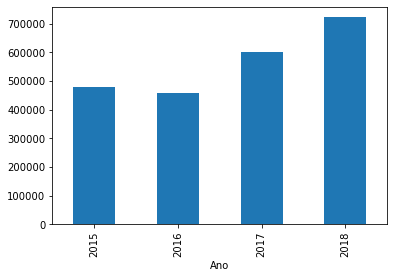

In [14]:
# Usando essa coluna no group by e criando um plot de barras
base.groupby("Ano")["Sales"].sum().plot.bar();

## Melhorando o visual desse gráfico
- Podemos melhorar muito a visualização desse gráfico. Vamos fazer isso!

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Valores que vamos usar para criar o nosso gráfico
soma_ano = base.groupby("Ano")["Sales"].sum()

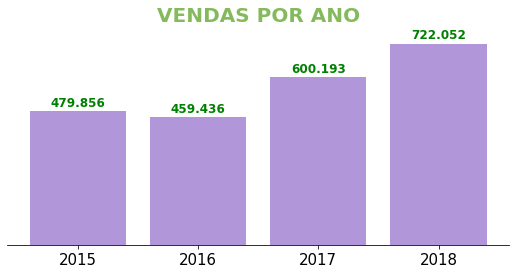

In [17]:
# Tamanho da figura
fig,ax = plt.subplots(
            figsize = (9,4)
        )

# Cor do título
ax.set_title("VENDAS POR ANO",
            fontsize=20,
            fontweight="bold",
            color="#84ba5b"
            )

# Cor das barras
ax.bar(soma_ano.index,soma_ano.values,
       color= "#b196d9"
      )
#xaxis.set_ticks define quais os valores que eu quero no meu eixo x
ax.xaxis.set_ticks([2015,2016,2017,2018])

#aumentando as letras do label no eixo x
ax.tick_params(axis='x',labelsize=15)
# Texto do annotate
for i in range(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',','.'), 
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y)
                ha="center",
                xytext=(0,5),
                textcoords="offset points",
                fontsize=12,
                color="green",
                fontweight="bold"
               )
#Por ultimo vamos tirar os limitadores
ax.set_yticks([0,780000])
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

# Venda por mês

#### Também podemos mostrar essa visão por meses
- Para isso, podemos usar o **.month** da biblioteca datetime para criar uma nova coluna apenas com o mês dessa base

In [18]:
# Criando uma coluna com o mês
base['Mes'] = base['Order Date'].dt.month

In [19]:
base.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8


In [20]:
# Fazendo o groupby agora por mês e ano
soma_mes = base.groupby(["Mes","Ano"])["Sales"].sum()

In [21]:
# Verificando os valores gerados
soma_mes.head()

Mes  Ano 
1    2015    28828.2540
     2016    29347.3864
     2017    38048.1840
     2018    59767.0910
2    2015    12588.4840
Name: Sales, dtype: float64

**Com o <font color="blue">.reset_index()</font> conseguimos transformar os índices em colunas e então aplicar todas as propriedades que conhecemos para o DataFrame**

In [22]:
# Vamos transformar os índices em colunas
soma_mes = soma_mes.reset_index()

In [23]:
# Visualizando a base novamente
soma_mes.head()

,Mes,Ano,Sales
0,1,2015,28828.2540
1,1,2016,29347.3864
2,1,2017,38048.1840
3,1,2018,59767.0910
4,2,2015,12588.4840


In [24]:
soma_mes[soma_mes.Ano == 2015].Sales.values

array([28828.254 , 12588.484 , 54027.692 , 24710.016 , 29520.49  ,
       29181.3346, 35194.558 , 37349.2655, 65956.3998, 34561.947 ,
       64369.4565, 63568.3107])

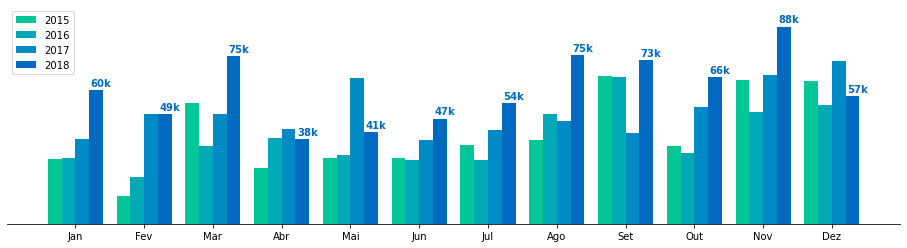

In [25]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )

ax.set_yticks(np.array([0,97000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y
    
ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) # Colocando rótulo no meu eixo
ax.tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x

plt.show()

### 4. <font color="blue"> Qual foi a categoria mais vendida? </font>
Precisamos primeiro entender a informação de categoria

In [26]:
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11


In [27]:
# Podemos fazer um groupby da categoria
base.groupby("Category")["Sales"].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

**Como estamos falando de 4 anos diferentes, seria interessante entender como foram essas categorias em cada um dos anos**
Temos uma possibilidade de ter uma categoria que foi implementada em um tempo diferente das outras então analisar os numeros de forma global pode não dar uma ideia legal do movimento estatístico das categorias

**Uma forma de visualizar melhor essas informações é fazer um gráfico de barras com esses dados, bem semelhante ao que fizemos acima**

In [28]:
# Criando agora a base de categorias como fizemos anteriormente
categoria = base.groupby(["Category","Ano"])["Sales"].sum()
categoria = categoria.reset_index()
categoria

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


**Utilizando a mesma lógica do gráfico anterior**

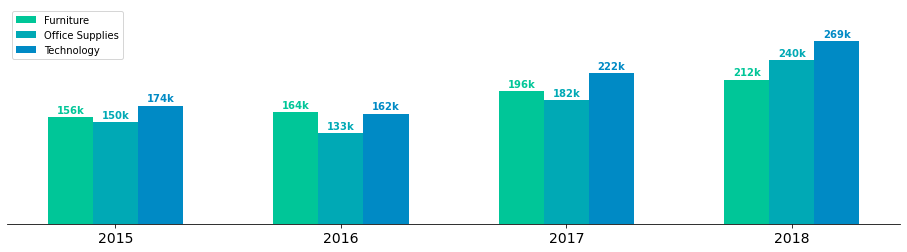

In [29]:
# Vamos utilizar o mesmo código do gráfico anterior para exibir por categorias
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid, 
       categoria[categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", # Cor das barras
       label='Furniture', # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", # Cor das barras
       label='Office Supplies', # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", # Cor das barras
       label='Technology', # Label dos dados
       width=wid # Largura das barras
      )

ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,categoria[categoria.Category == 'Furniture'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00c698" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],categoria[categoria.Category == 'Office Supplies'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00a9b5" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,categoria[categoria.Category == 'Technology'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#008ac5" # Cor dos rótulos
            )
ax.set_yticks(np.array([0,320000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y
    
ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

plt.show()

### 4. <font color="blue"> Qual o item mais vendido? </font>
Vamos seguir exatamente a mesma lógica da categoria

In [30]:
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11


In [31]:
# Podemos fazer um groupby do item
itens = base.groupby("Product Name")["Sales"].sum()
itens = itens.reset_index()
itens = itens.sort_values("Sales",ascending=False)
itens.head()

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479


In [32]:
# Definindo o top n itens de maneira dinamica 
n = 10
top_n_itens = itens.head(n)
top_n_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


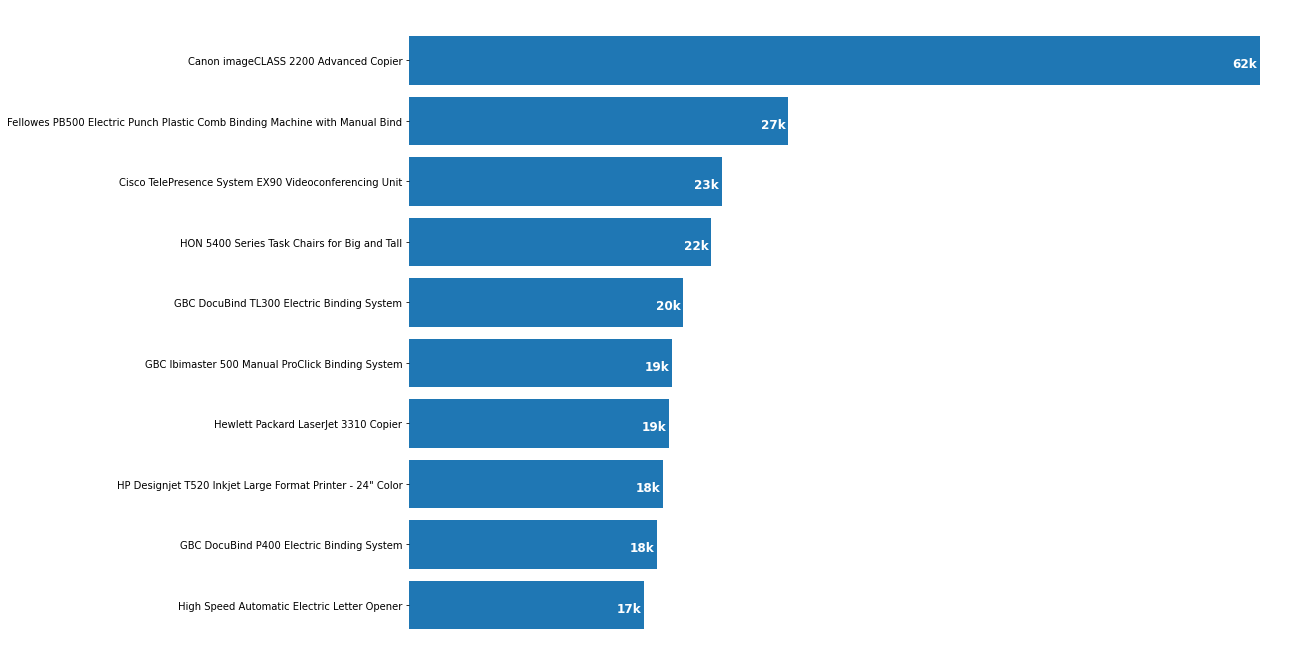

In [33]:
# Vamos traçar um gráfico de barras horizontais para mostrar o top itens
fig,ax = plt.subplots(
            figsize = (16,12)
        )

ax.barh(top_n_itens['Product Name'].values, #Valores de y
        top_n_itens['Sales'].values, # Valores de x 
        align='center')

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)

for i in np.arange(0,n):
    ax.annotate('{:,.0f}k'.format(top_n_itens['Sales'].values[i]/1000), 
                (top_n_itens['Sales'].values[i],i), 
                ha="center", va="top", xytext=(-15,3), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="white")
    
ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

**Agora agrupando por ítem e ano**

In [34]:
# Podemos fazer um groupby de item e ano
itens_ano = base.groupby(["Product Name","Ano"])["Sales"].sum()
itens_ano = itens_ano.reset_index()
itens_ano

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502
...,...,...,...
5269,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,2018,205.086
5270,netTALK DUO VoIP Telephone Service,2015,335.936
5271,netTALK DUO VoIP Telephone Service,2016,230.956
5272,netTALK DUO VoIP Telephone Service,2017,377.928


In [35]:
# Para visualizar algum item dos top itens
itens_ano[itens_ano["Product Name"] == top_n_itens.iloc[2,0]]

,Product Name,Ano,Sales
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.48


In [36]:
# Temos a nossa base de top itens
top_n_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Como podemos cruzar a base com todos os anos de 2015 a 2018?**
- Basta transformar as datas em um DataFrame e usar o merge para fazer essa união

In [37]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ['Ano']
df_datas

,Ano
0,2018
1,2017
2,2016
3,2015


In [38]:
df_datas['uniao'] = 'unir'
itens['uniao'] = 'unir'

In [39]:
# Definindo o top n itens
n = 5
top_n_itens = itens.head(n)

**Agora que temos uma coluna que conseguimos relacionar, podemos fazer o merge das bases**

In [40]:
produto_ano = pd.merge(
    top_n_itens, # <- primeira base
    df_datas, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on="uniao" # <- coluna que vamos usar para fazer essa junção das bases
) 

produto_ano.head()

,Product Name,Sales,uniao,Ano
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018


#### Agora podemos voltar para a base itens_ano e fazer a junção com essa base acima

In [41]:
display(itens_ano)

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502
...,...,...,...
5269,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,2018,205.086
5270,netTALK DUO VoIP Telephone Service,2015,335.936
5271,netTALK DUO VoIP Telephone Service,2016,230.956
5272,netTALK DUO VoIP Telephone Service,2017,377.928


In [42]:
itens_ano_grafico = pd.merge(
    produto_ano,
    itens_ano,
    how='left',
    on=['Product Name','Ano']
)
        
itens_ano_grafico.head()

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742


In [43]:
itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values

array([35699.898,  7371.742,       nan,  7220.094, 10943.278])

**Como resultado final, teremos o gráfico abaixo**

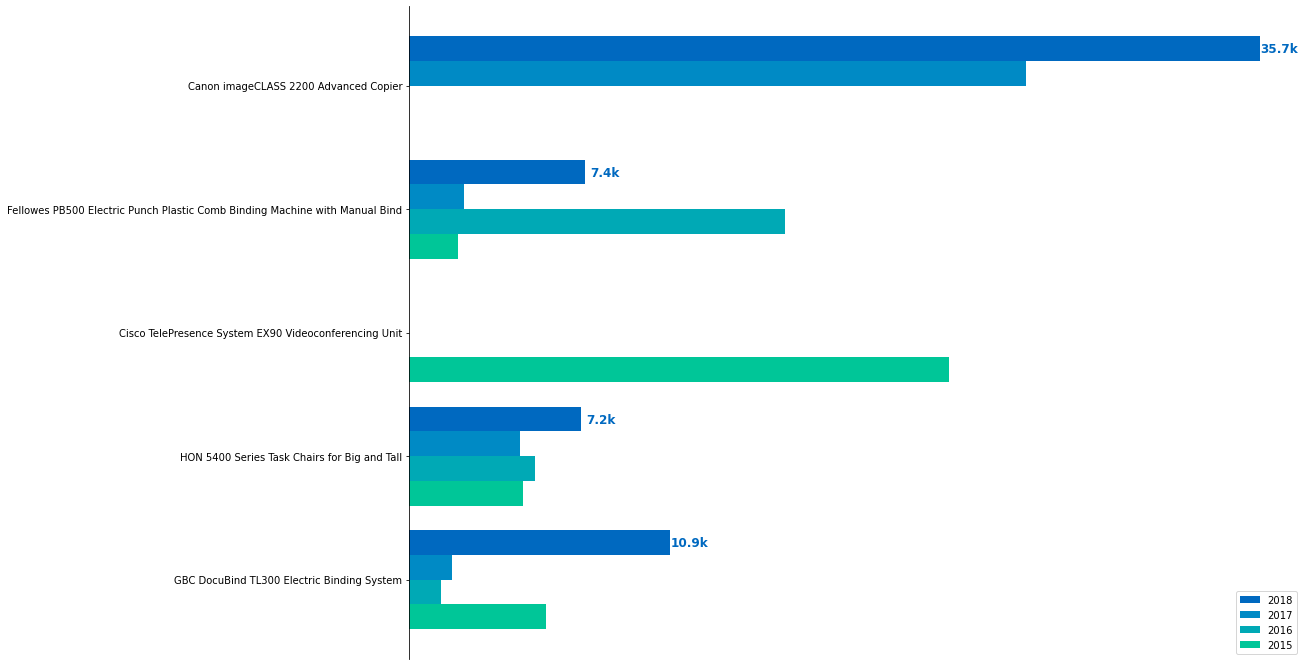

In [44]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,12)
        )

hgt = 0.2

qtd_itens = len(top_n_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values, # Valores de x 
        align='center',
        height=hgt, # Comprimento do gráfico
        label=2018,
        color="#0069c0"
       )
ax.barh(np.arange(0,qtd_itens)-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2017,color="#008ac5")
ax.barh(np.arange(0,qtd_itens)+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2016,color="#00a9b5")
ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2015,color="#00c698")

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)
ax.legend()

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_n_itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10) # Melhorando o visual do eixo x

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()